In [1]:
# TASKS:
# 1.) Visualize the progress of vaccinations in the US
# 2.) Highlight insights
# 3.) In a couple of points, summarize findings

In [2]:
%matplotlib notebook

In [3]:
# Importing dependencies

import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Doses Administered

In [4]:
# Total US Vaccinations

total_vaccinations_df = pd.read_excel("resources/total_COVID-19_vaccinations_us.xlsx")
total_vaccinations_df

,State/Territory/Federal Entity,Total Doses Administered by State where Administered,Doses Administered per 100k by State where Administered,18+ Doses Administered by State where Administered,18+ Doses Administered per 100K by State where Administered
0,Alabama,"2,758,021",56.250,"2,741,041",71.851
1,Alaska,571.32,78.098,557.906,101.150
2,American Samoa,39.666,71.228,38.321,88.222
3,Arizona,"5,337,459",73.330,"5,260,392",93.294
4,Arkansas,"1,885,668",62.485,"1,863,212",80.392
...,...,...,...,...,...
58,Virginia,"7,185,843",84.188,"7,071,215",105.941
59,Washington,"6,293,784",82.651,"6,219,628",104.499
60,West Virginia,"1,212,466",67.654,"1,193,173",83.288
61,Wisconsin,"4,917,970",84.466,"4,849,978",106.456


In [5]:
# Renaming columns for efficiency/readability

total_vaccinations_df = total_vaccinations_df.rename(columns = {
    "State/Territory/Federal Entity": "State/Territory",
    "Total Doses Administered by State where Administered": "Doses Administered",
    "Doses Administered per 100k by State where Administered": "Doses per 100k",
    "18+ Doses Administered by State where Administered": "Doses Administered (18+)",
    "18+ Doses Administered per 100K by State where Administered": "Doses per 100k (18+)"
})

total_vaccinations_df.head()

,State/Territory,Doses Administered,Doses per 100k,Doses Administered (18+),Doses per 100k (18+)
0,Alabama,"2,758,021",56.250,"2,741,041",71.851
1,Alaska,571.32,78.098,557.906,101.150
2,American Samoa,39.666,71.228,38.321,88.222
3,Arizona,"5,337,459",73.330,"5,260,392",93.294
4,Arkansas,"1,885,668",62.485,"1,863,212",80.392


In [6]:
# Checking to see if there are duplicate entries for State/Territory

print(len(total_vaccinations_df["State/Territory"]))
print(len(total_vaccinations_df["State/Territory"].unique()))

63
63


In [7]:
# Sorting total_vaccinations_df by Doses per 100k column before creating bar chart

total_vaccinations_df = total_vaccinations_df.sort_values(by = "Doses per 100k", ascending = False)
total_vaccinations_df

,State/Territory,Doses Administered,Doses per 100k,Doses Administered (18+),Doses per 100k (18+)
48,Republic of Palau,20.615,115.123,20.615,147.598
55,Vermont,616.692,98.831,610.636,119.736
28,Massachusetts,"6,785,409",98.446,"6,675,790",120.508
8,Connecticut,"3,475,019",97.468,"3,413,476",120.284
16,Hawaii,"1,376,756",97.237,"1,359,855",121.850
...,...,...,...,...,...
26,Marshall Islands,28.356,48.544,28.299,62.111
12,Federated States of Micronesia,37.135,35.830,37.113,45.908
5,Bureau of Prisons,161.237,NaN,161.236,NaN
10,Dept of Defense,"3,111,927",NaN,"3,087,124",NaN


In [8]:
# Because the data for columns describing values as being "per 100k" do not match CDC dashboard values...
# Assumption: Values from columns with "per 100k" in the title must be multiplied by 1000

total_vaccinations_df["Doses per 100k"] = total_vaccinations_df["Doses per 100k"] * 1000
total_vaccinations_df

,State/Territory,Doses Administered,Doses per 100k,Doses Administered (18+),Doses per 100k (18+)
48,Republic of Palau,20.615,115123.0,20.615,147.598
55,Vermont,616.692,98831.0,610.636,119.736
28,Massachusetts,"6,785,409",98446.0,"6,675,790",120.508
8,Connecticut,"3,475,019",97468.0,"3,413,476",120.284
16,Hawaii,"1,376,756",97237.0,"1,359,855",121.850
...,...,...,...,...,...
26,Marshall Islands,28.356,48544.0,28.299,62.111
12,Federated States of Micronesia,37.135,35830.0,37.113,45.908
5,Bureau of Prisons,161.237,NaN,161.236,NaN
10,Dept of Defense,"3,111,927",NaN,"3,087,124",NaN


<IPython.core.display.Javascript object>


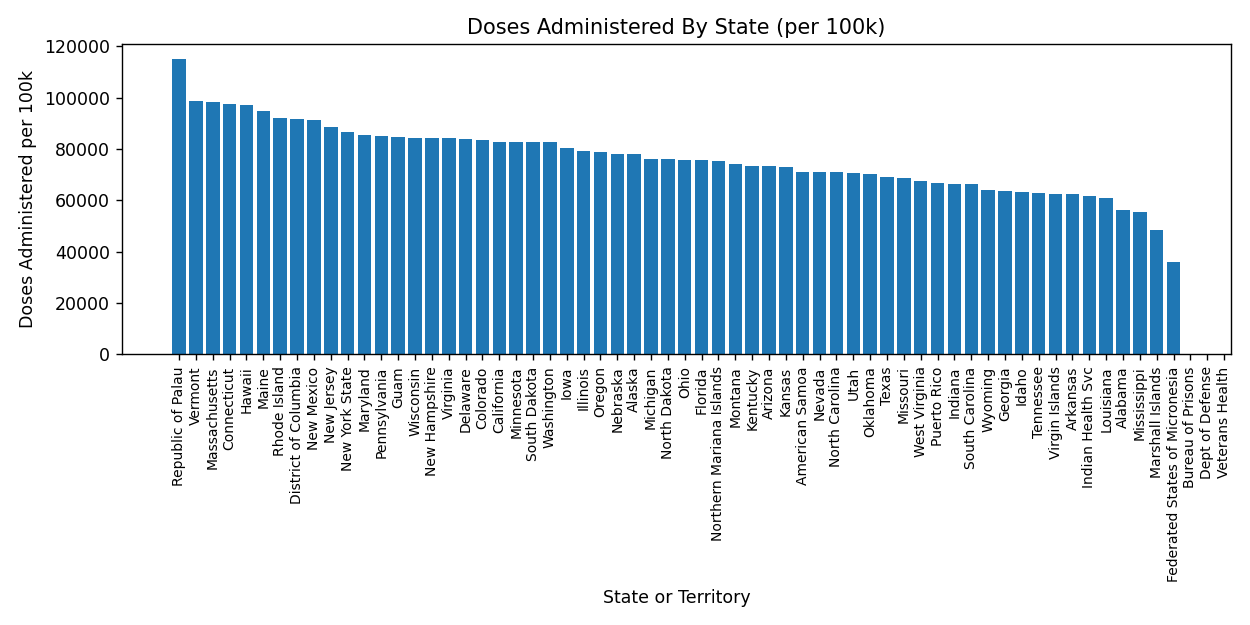

In [9]:
# Comparing doses per 100k by state
# This will give a better understanding of state progress than raw Doses Administered

x = total_vaccinations_df["State/Territory"]
y = total_vaccinations_df["Doses per 100k"]

plt.figure(figsize = (10,5))
plt.bar(x, y)

plt.xlabel("State or Territory")
plt.ylabel("Doses Administered per 100k")
plt.title("Doses Administered By State (per 100k)")

plt.xticks(rotation = 90, fontsize = 8)
plt.tight_layout()

plt.savefig("visualizations/doses_per_100k_by_state.png")

plt.show()

# Vaccinations (United States & by State)

In [10]:
# Vaccinations by State

state_vaccinations_df = pd.read_excel("resources/us_state_vaccinations.xlsx")
state_vaccinations_df

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7557.0,7498.0,1529.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7623,2021-05-04,Wyoming,361199.0,483595.0,198293.0,28.34,62.41,163997.0,34.26,83.56,2654.0,1786.0,3086.0,0.747
7624,2021-05-05,Wyoming,363149.0,485195.0,198821.0,28.57,62.75,165330.0,34.35,83.83,1950.0,2038.0,3521.0,0.748
7625,2021-05-06,Wyoming,363390.0,486635.0,198930.0,28.61,62.79,165555.0,34.37,84.08,241.0,1427.0,2466.0,0.747
7626,2021-05-07,Wyoming,367548.0,487055.0,200309.0,29.09,63.51,168356.0,34.61,84.16,4158.0,1642.0,2837.0,0.755


In [11]:
# Getting range of dates

most_recent = state_vaccinations_df["date"].max()
print(most_recent)

oldest = state_vaccinations_df["date"].min()
print(oldest)

2021-05-08 00:00:00
2020-12-20 00:00:00


In [12]:
state_vaccinations_df = state_vaccinations_df.sort_values(by = "date", ascending = True)
state_vaccinations_df

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
6435,2020-12-20,United States,556208.0,NaN,NaN,NaN,0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6436,2020-12-21,United States,614117.0,NaN,NaN,NaN,0.18,NaN,NaN,NaN,57909.000000,57909.0,174.0,NaN
6437,2020-12-22,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196954.000000,127432.0,384.0,NaN
6438,2020-12-23,United States,1008025.0,NaN,NaN,NaN,0.30,NaN,NaN,NaN,196954.000000,150606.0,454.0,NaN
6439,2020-12-24,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312186.666667,191001.0,575.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,2021-05-08,Illinois,10036784.0,12855545.0,6144296.0,33.26,79.21,4214851.0,48.49,101.45,74985.000000,69359.0,5473.0,0.781
2105,2021-05-08,Idaho,1132242.0,1490225.0,625950.0,29.04,63.36,518882.0,35.03,83.39,7125.000000,6436.0,3601.0,0.760
6200,2021-05-08,South Dakota,731351.0,910375.0,403193.0,39.65,82.67,350806.0,45.58,102.91,6869.000000,2942.0,3326.0,0.803
7510,2021-05-08,Wisconsin,4917970.0,5555605.0,2735459.0,38.64,84.47,2249889.0,46.98,95.42,43314.000000,31033.0,5330.0,0.885


In [13]:
# Want to visualize country's progress as a whole

us_total_df = state_vaccinations_df.loc[state_vaccinations_df.location == 'United States']
us_total_df

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
6435,2020-12-20,United States,556208.0,NaN,NaN,NaN,0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6436,2020-12-21,United States,614117.0,NaN,NaN,NaN,0.18,NaN,NaN,NaN,5.790900e+04,57909.0,174.0,NaN
6437,2020-12-22,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.969540e+05,127432.0,384.0,NaN
6438,2020-12-23,United States,1008025.0,NaN,NaN,NaN,0.30,NaN,NaN,NaN,1.969540e+05,150606.0,454.0,NaN
6439,2020-12-24,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.121867e+05,191001.0,575.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6570,2021-05-04,United States,247769049.0,318474035.0,147894671.0,31.98,74.63,106168588.0,44.55,95.93,9.888460e+05,2194483.0,6610.0,0.778
6571,2021-05-05,United States,249566820.0,321549335.0,148562891.0,32.33,75.17,107346533.0,44.75,96.85,1.797771e+06,2132487.0,6423.0,0.776
6572,2021-05-06,United States,251973752.0,324610185.0,149462265.0,32.81,75.90,108926627.0,45.02,97.78,2.406932e+06,2087608.0,6288.0,0.776
6573,2021-05-07,United States,254779333.0,327124625.0,150416559.0,33.40,76.74,110874920.0,45.31,98.53,2.805581e+06,2088522.0,6291.0,0.779


In [14]:
us_total_df["people_fully_vaccinated_per_hundred"] = us_total_df["people_fully_vaccinated_per_hundred"].dropna(how="any")
us_total_df

<ipython-input-14-c63db4577287>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_total_df["people_fully_vaccinated_per_hundred"] = us_total_df["people_fully_vaccinated_per_hundred"].dropna(how="any")


,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
6435,2020-12-20,United States,556208.0,NaN,NaN,NaN,0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6436,2020-12-21,United States,614117.0,NaN,NaN,NaN,0.18,NaN,NaN,NaN,5.790900e+04,57909.0,174.0,NaN
6437,2020-12-22,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.969540e+05,127432.0,384.0,NaN
6438,2020-12-23,United States,1008025.0,NaN,NaN,NaN,0.30,NaN,NaN,NaN,1.969540e+05,150606.0,454.0,NaN
6439,2020-12-24,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.121867e+05,191001.0,575.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6570,2021-05-04,United States,247769049.0,318474035.0,147894671.0,31.98,74.63,106168588.0,44.55,95.93,9.888460e+05,2194483.0,6610.0,0.778
6571,2021-05-05,United States,249566820.0,321549335.0,148562891.0,32.33,75.17,107346533.0,44.75,96.85,1.797771e+06,2132487.0,6423.0,0.776
6572,2021-05-06,United States,251973752.0,324610185.0,149462265.0,32.81,75.90,108926627.0,45.02,97.78,2.406932e+06,2087608.0,6288.0,0.776
6573,2021-05-07,United States,254779333.0,327124625.0,150416559.0,33.40,76.74,110874920.0,45.31,98.53,2.805581e+06,2088522.0,6291.0,0.779


<IPython.core.display.Javascript object>


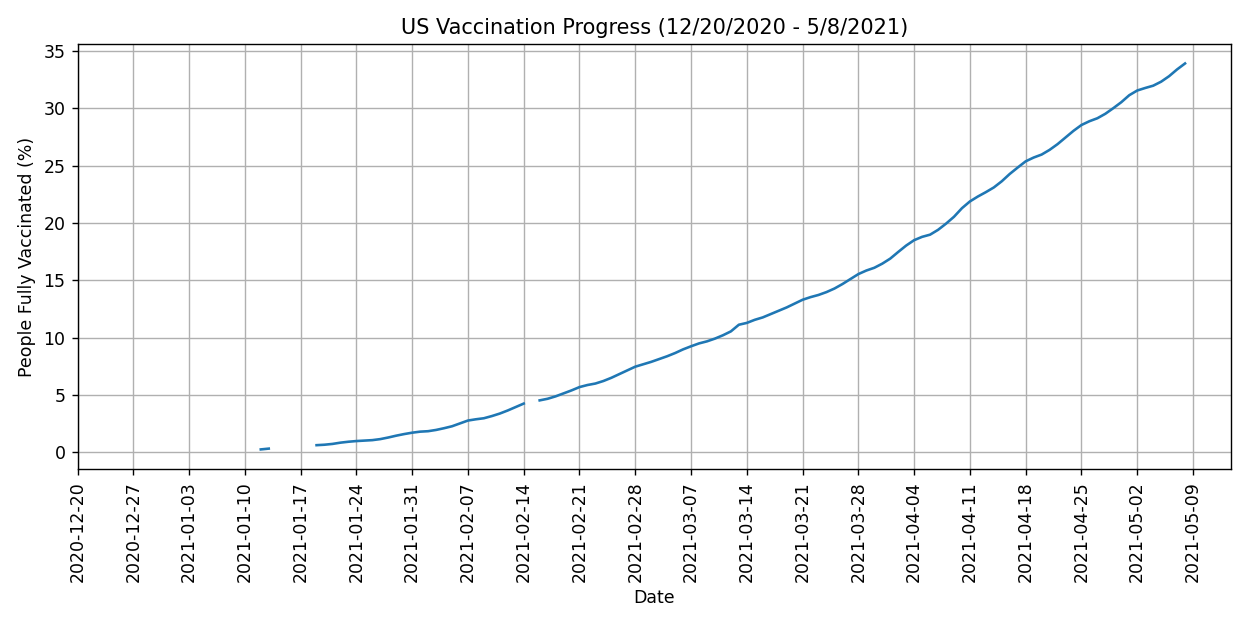

In [34]:
# People fully vaccinated (per hundred, or %)

x = us_total_df["date"].tolist()
y = us_total_df["people_fully_vaccinated_per_hundred"].tolist()

plt.figure(figsize = (10,5))
plt.plot(x,y)

plt.xticks(rotation = 90)
plt.xlabel("Date")
plt.ylabel("People Fully Vaccinated (%)")
plt.title("US Vaccination Progress (12/20/2020 - 5/8/2021)")

plt.xticks(pd.date_range('2020-12-20', '2021-5-09', freq="W"))
plt.yticks(np.arange(0, 40, 5))

plt.grid(True)

plt.tight_layout()
plt.savefig("visualizations/people_fuly_vaccinated.png")

plt.show()


<IPython.core.display.Javascript object>


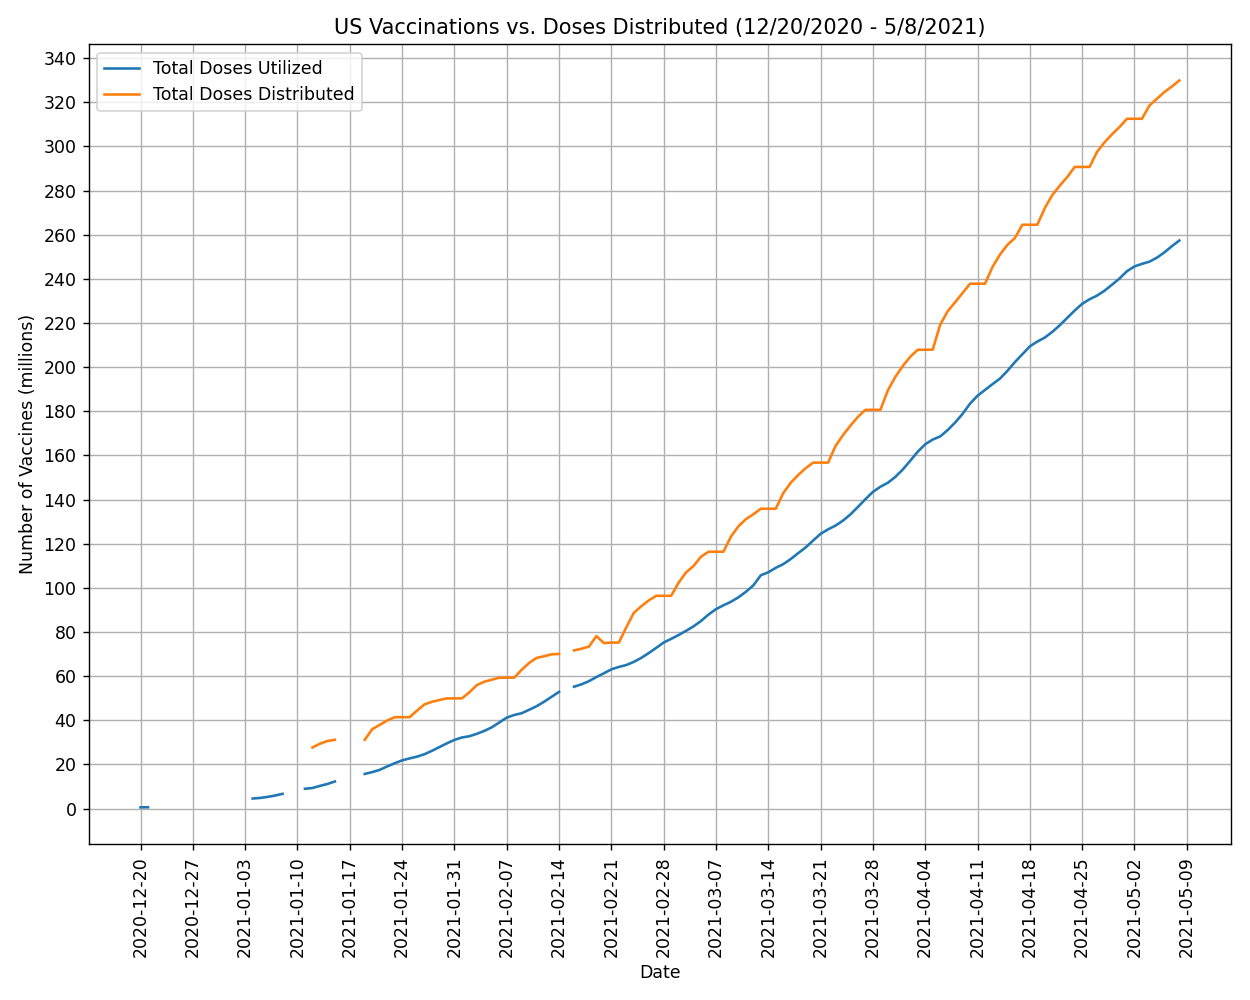

In [33]:
# US vaccinations vs. number of doses distributed

x = us_total_df["date"].tolist()
y1 = us_total_df["total_vaccinations"]/1000000
y2 = us_total_df["total_distributed"]/1000000

plt.figure(figsize = (10,8))
plt.plot(x,y1, label = "Total Doses Utilized")
plt.plot(x,y2, label = "Total Doses Distributed")

plt.xticks(rotation = 90)
plt.xlabel("Date")
plt.ylabel("Number of Vaccines (millions)")
plt.title("US Vaccinations vs. Doses Distributed (12/20/2020 - 5/8/2021)")

plt.xticks(pd.date_range('2020-12-20', '2021-5-09', freq="W"))
plt.yticks(np.arange(0, y2.max() + 20, 20))

plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("visualizations/vaccinations_vs_distributed.png")

plt.show()


In [115]:
# Maximum daily vaccinations

us_total_df["daily_vaccinations"].max()

us_total_df.loc[us_total_df["daily_vaccinations"] == 3384387, :]

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
6549,2021-04-13,United States,192282781.0,245364805.0,122295530.0,22.69,57.92,75322283.0,36.84,73.91,2590736.0,3384387.0,10194.0,0.784


<IPython.core.display.Javascript object>


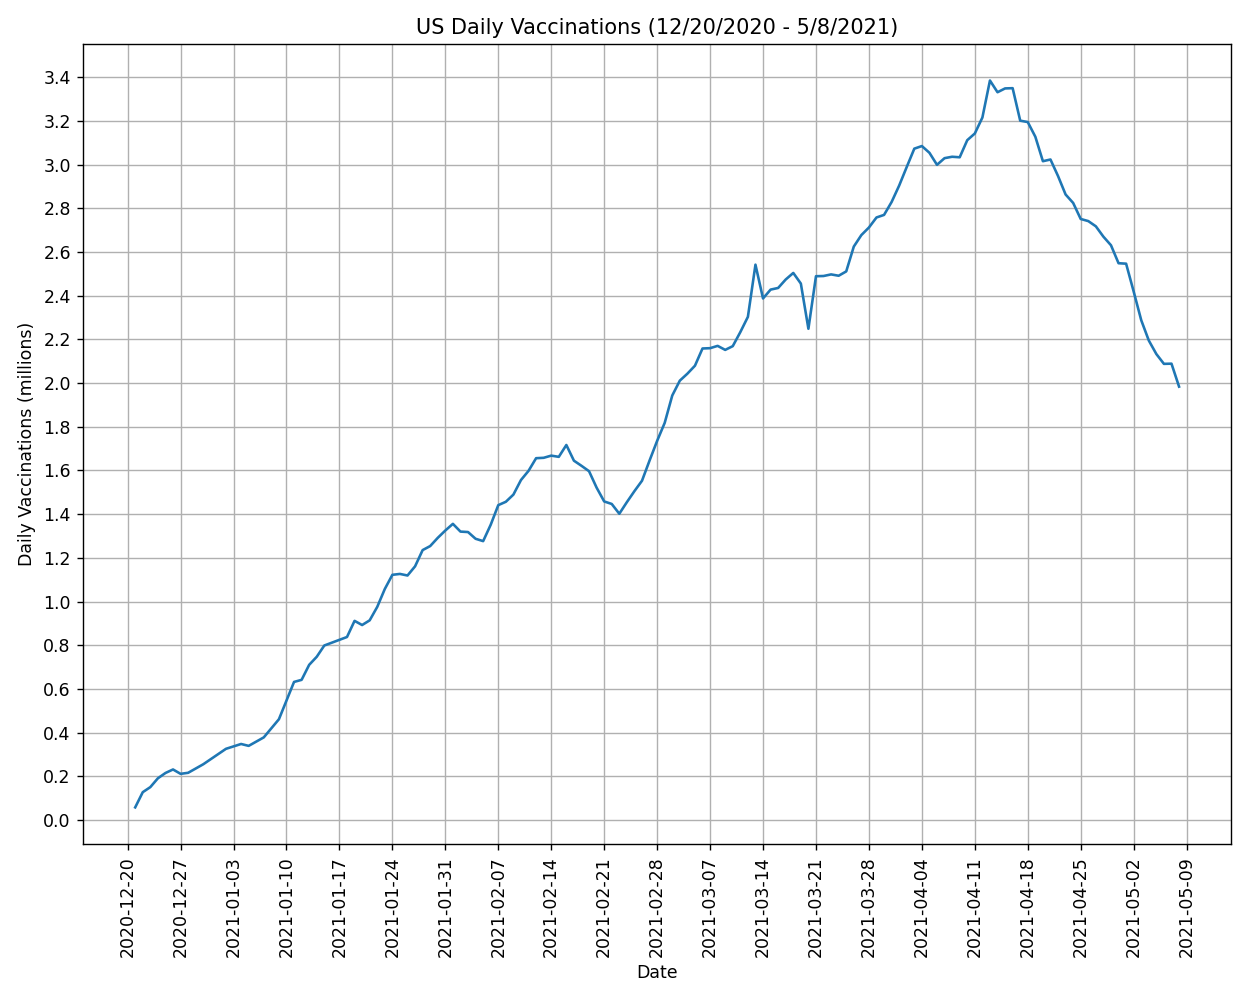

In [35]:
# Tracking improvements in daily vaccinations

x = us_total_df["date"].tolist()
y = us_total_df["daily_vaccinations"]/1000000

plt.figure(figsize = (10,8))
plt.plot(x,y)

plt.xticks(rotation = 90)
plt.xlabel("Date")
plt.ylabel("Daily Vaccinations (millions)")
plt.title("US Daily Vaccinations (12/20/2020 - 5/8/2021)")

plt.xticks(pd.date_range('2020-12-20', '2021-5-09', freq="W"))
plt.yticks(np.arange(0, y.max() + 0.2, 0.2))

plt.grid(True)

plt.tight_layout()
plt.savefig("visualizations/daily_vaccinations.png")
plt.show()

In [39]:
# Comparing current (as of 5/08/2021) state progress in fully vaccinating their citizens

state_vaccinations_df

current_by_state = state_vaccinations_df.loc[state_vaccinations_df.date == '2021-05-08', :]
current_by_state

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
4913,2021-05-08,North Carolina,7435976.0,10441180.0,4233679.0,32.11,70.90,3367458.0,40.37,99.55,56760.0,51070.0,4869.0,0.712
3860,2021-05-08,Mississippi,1655408.0,2496365.0,951358.0,25.11,55.62,747305.0,31.97,83.88,9389.0,9131.0,3068.0,0.663
5030,2021-05-08,North Dakota,579625.0,654800.0,304640.0,34.19,76.06,260528.0,39.98,85.92,4082.0,2018.0,2648.0,0.885
4679,2021-05-08,New Mexico,1915224.0,2112295.0,1105318.0,41.20,91.34,863845.0,52.71,100.74,20456.0,14012.0,6682.0,0.907
4328,2021-05-08,Nevada,2186639.0,2636770.0,1264701.0,30.91,70.99,952097.0,41.06,85.61,19200.0,15871.0,5153.0,0.829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,2021-05-08,Illinois,10036784.0,12855545.0,6144296.0,33.26,79.21,4214851.0,48.49,101.45,74985.0,69359.0,5473.0,0.781
2105,2021-05-08,Idaho,1132242.0,1490225.0,625950.0,29.04,63.36,518882.0,35.03,83.39,7125.0,6436.0,3601.0,0.760
6200,2021-05-08,South Dakota,731351.0,910375.0,403193.0,39.65,82.67,350806.0,45.58,102.91,6869.0,2942.0,3326.0,0.803
7510,2021-05-08,Wisconsin,4917970.0,5555605.0,2735459.0,38.64,84.47,2249889.0,46.98,95.42,43314.0,31033.0,5330.0,0.885


In [40]:
# Checking value counts for dates

current_by_state["date"].value_counts()

2021-05-08    65
Name: date, dtype: int64

In [43]:
# Sorting by people_fully_vaccinated_per_hundred

current_by_state = current_by_state.sort_values(by = "people_fully_vaccinated_per_hundred", ascending = False)
current_by_state.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
5849,2021-05-08,Republic of Palau,20615.0,24600.0,12965.0,50.93,115.12,9120.0,72.40,137.38,0.0,44.0,2457.0,0.838
3158,2021-05-08,Maine,1276596.0,1520230.0,768149.0,44.42,94.97,597051.0,57.14,113.09,13154.0,10865.0,8083.0,0.840
1052,2021-05-08,Connecticut,3475019.0,4077035.0,2034240.0,43.57,97.47,1553340.0,57.06,114.35,37818.0,30099.0,8442.0,0.852
3509,2021-05-08,Massachusetts,6785409.0,8068900.0,4115668.0,41.64,98.45,2869733.0,59.71,117.07,94605.0,72713.0,10550.0,0.841
6808,2021-05-08,Vermont,616692.0,757120.0,374046.0,41.55,98.83,259250.0,59.94,121.34,5111.0,6553.0,10502.0,0.815


<IPython.core.display.Javascript object>


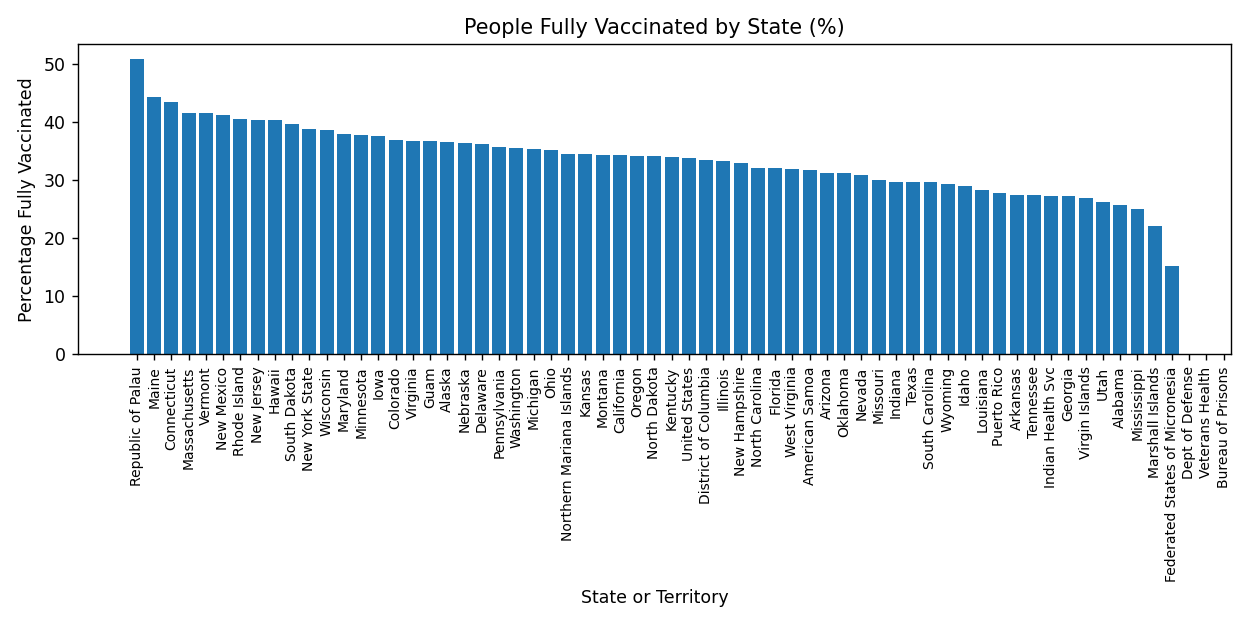

In [44]:
# Looks good!
# Creating a bar chart comparing states' current vaccination progress using people_fully_vaccinated_per_hundred as a metric
# This is effectively comparing by % of people fully vaccinated

x = current_by_state["location"]
y = current_by_state["people_fully_vaccinated_per_hundred"]

plt.figure(figsize = (10,5))
plt.bar(x, y)

plt.xlabel("State or Territory")
plt.ylabel("Percentage Fully Vaccinated")
plt.title("People Fully Vaccinated by State (%)")

plt.xticks(rotation = 90, fontsize = 8)
plt.tight_layout()

plt.savefig("visualizations/people_fully_vaccinated_by_state.png")

plt.show()

# BONUS

In [45]:
# Use data to show the effect that the vaccine had on the number of new cases and new deaths.

cases_deaths_df = pd.read_csv("resources/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv")
cases_deaths_df

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/10/2021,TX,1954406,NaN,NaN,15855,2665.0,34346,NaN,NaN,302,0.0,01/11/2021 12:00:00 AM,Not agree,Not agree
1,02/12/2021,UT,359641,359641.0,0.0,1060,0.0,1785,1729.0,56.0,11,2.0,02/13/2021 02:50:08 PM,Agree,Agree
2,04/16/2020,TX,16455,NaN,NaN,963,0.0,551,NaN,NaN,32,NaN,04/17/2020 12:00:00 AM,Not agree,Not agree
3,05/17/2020,RMI,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,05/18/2020 04:01:54 PM,Agree,Agree
4,07/27/2020,NY,188293,NaN,NaN,318,0.0,8822,NaN,NaN,2,0.0,07/28/2020 02:21:07 PM,Not agree,Not agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28975,04/30/2021,SD,122660,NaN,NaN,128,17.0,1967,1601.0,366.0,5,1.0,05/01/2021 01:43:22 PM,NaN,Agree
28976,01/27/2020,WV,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Not agree
28977,10/27/2020,TN,257243,242836.0,14407.0,4137,456.0,3448,3246.0,202.0,31,4.0,10/27/2020 12:00:00 AM,Agree,Agree
28978,04/05/2021,NM,192595,NaN,NaN,443,0.0,3953,NaN,NaN,4,0.0,04/06/2021 01:43:58 PM,NaN,Not agree


In [54]:
# Checking type of date column. It's a string. Converting it to time stamp.

type(cases_deaths_df["submission_date"][0])
cases_deaths_df["submission_date"] = pd.to_datetime(cases_deaths_df["submission_date"])
type(cases_deaths_df["submission_date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [58]:
# Sorting by date (chronologically). 

cases_deaths_df = cases_deaths_df.sort_values(by = "submission_date", ascending = True)
cases_deaths_df

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
14657,2020-01-22,CA,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Not agree
15931,2020-01-22,WA,1,NaN,NaN,1,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,NaN,NaN
27254,2020-01-22,AK,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,NaN,NaN
1260,2020-01-22,NY,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Not agree
857,2020-01-22,GA,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27677,2021-05-18,IA,369690,NaN,NaN,201,65.0,6013,NaN,NaN,7,7.0,05/19/2021 02:37:49 PM,Not agree,Not agree
19867,2021-05-18,VA,671325,522588.0,148737.0,491,265.0,11048,9323.0,1725.0,6,2.0,05/19/2021 02:37:49 PM,Agree,Agree
4812,2021-05-18,UT,402988,402988.0,0.0,257,0.0,2271,2201.0,70.0,12,3.0,05/19/2021 02:37:49 PM,Agree,Agree
2715,2021-05-18,MA,702776,657478.0,45298.0,438,79.0,17779,17419.0,360.0,7,1.0,05/19/2021 02:37:49 PM,Agree,Agree


In [60]:
cases_deaths_df["state"].unique()

array(['CA', 'WA', 'AK', 'NY', 'GA', 'TN', 'MS', 'MP', 'FSM', 'PA', 'NYC',
       'MI', 'NV', 'TX', 'OR', 'LA', 'CO', 'NM', 'CT', 'WI', 'IL', 'MD',
       'ME', 'ND', 'VI', 'MN', 'VT', 'AZ', 'RMI', 'VA', 'ID', 'DE', 'GU',
       'WV', 'RI', 'AL', 'NH', 'PW', 'KS', 'UT', 'HI', 'IN', 'NC', 'NE',
       'AR', 'SD', 'FL', 'OH', 'AS', 'OK', 'MO', 'KY', 'IA', 'PR', 'MA',
       'MT', 'DC', 'WY', 'NJ', 'SC'], dtype=object)

In [101]:
# Generating a list of shared dates between us_total_df and cases_deaths_df

shared_dates = []

format = "%m/%d/%Y"

for date in us_total_df["date"].tolist():
    if date in cases_deaths_df["submission_date"].tolist():
        shared_dates.append(date.strftime(format))

# print(shared_dates)

In [102]:
# Creating lists of total new cases and deaths per day

summed_new_cases = []

for date in shared_dates:
    us_day_case_total = cases_deaths_df.loc[cases_deaths_df["submission_date"] == date, "new_case"].sum()
    summed_new_cases.append(us_day_case_total)

# print(summed_new_cases)

summed_new_deaths = []

for date in shared_dates:
    us_day_death_total = cases_deaths_df.loc[cases_deaths_df.submission_date == date, "new_death"].sum()
    summed_new_deaths.append(us_day_death_total)

# print(summed_new_deaths)

In [103]:
every_7_dates = shared_dates[0:-1:7]
every_7_cases = summed_new_cases[0:-1:7]
every_7_deaths = summed_new_deaths[0:-1:7]

<IPython.core.display.Javascript object>


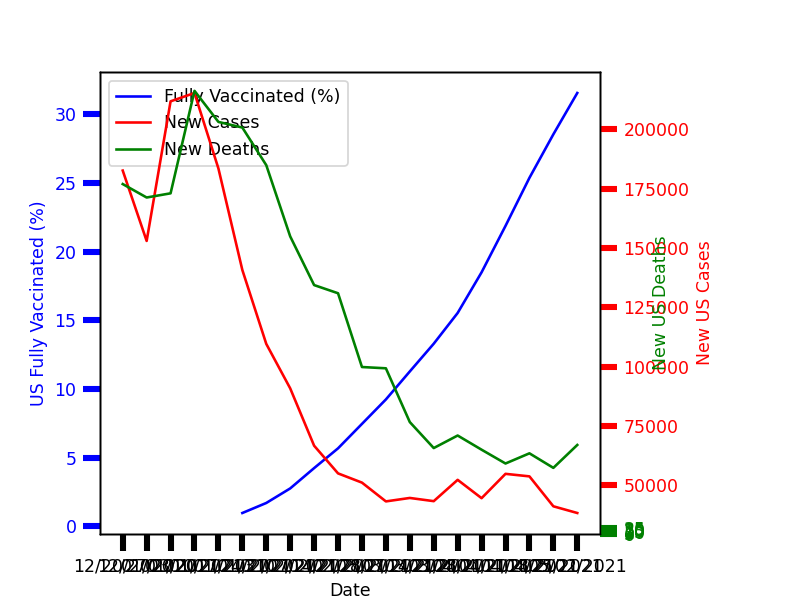

In [110]:
# Generating graph comparing percentage of people fully vaccinated to cases and deaths
# Using multiple y-axes

import matplotlib.dates as mdates

x = every_7_dates
y1 = us_total_df["people_fully_vaccinated_per_hundred"].tolist()[0:-1:7]
y2 = every_7_cases
y3 = every_7_deaths

# plt.figure(figsize = (10,8))
fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
twin2 = ax.twinx()

# twin2.spines.right.set_position(("axes", 1.2))

p1, = ax.plot(x, y1, "b-", label="Fully Vaccinated (%)")
p2, = twin1.plot(x, y2, "r-", label="New Cases")
p3, = twin2.plot(x, y3, "g-", label="New Deaths")

plt.xticks(every_7_dates)
plt.yticks(np.arange(0, 40, 5))

# ax.set_xlim(0, 2)
# ax.set_ylim(0, 2)
# twin1.set_ylim(0, 4)
# twin2.set_ylim(1, 65)

ax.set_xlabel("Date")
ax.set_ylabel("US Fully Vaccinated (%)")
twin1.set_ylabel("New US Cases")
twin2.set_ylabel("New US Deaths")

ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=10, width=3.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)

ax.legend(handles=[p1, p2, p3])

plt.savefig("visualizations/fully_vaccinated_with_cases_deaths.png")

plt.show()